## Realiza el análisis hidrológico de la cuenca de Danta


In [46]:
%matplotlib inline
from wmf import wmf 
import numpy as np
import pylab as pl
import datetime as dt
import os
import pandas as pd
import pickle
import plot_y_tablas as pyt
from scipy import stats as stat

In [97]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Lectura de mapas de direcciones y de elevación:

___
## Trazado de cuencas y corrientes 

In [100]:
cuCap = wmf.SimuBasin(0,0,0,0,rute='/media/nicolas/discoGrande/01_SIATA/nc_cuencas/Picacha_Abajo.nc')

In [6]:
#Guarda Vector de la cuenca
cuCap.Save_Basin2Map('/media/nicolas/discoGrande/01_SIATA/vector/Cuenca_AltaVista2.shp')

In [7]:
cuCap.Save_Net2Map('/media/nicolas/discoGrande/01_SIATA/vector/Red_Altavista_Abajo.shp',dx = 12.7, umbral=470)

### Tiempo de viaje 

In [8]:
cuCap.GetGeo_Parameters()

In [9]:
cuCap.Tc

{'Campo y Munera': 0.57998596426157101,
 'Direccion Carreteras Espana': 0.46243262008405484,
 'Giandotti': 0.56255080064090079,
 'John Stone': 1.4473803735315547,
 'Kiprich': 0.59417325923551134,
 'Temez': 0.20455629037544334,
 'US Army': 0.59125843592315985,
 'Ventura': 0.23583395960988951}

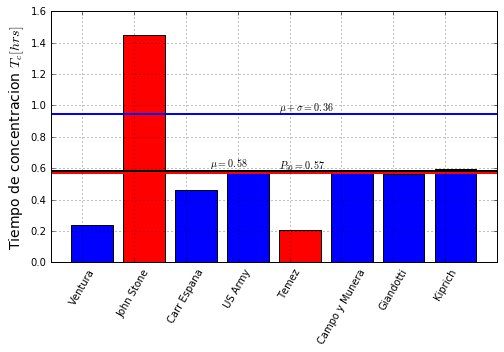

In [24]:
#Parametros Geomorfologicos de las cuencas 
cuCap.GetGeo_Parameters(rutaParamASC=ruta_images+'param_cap.txt',
    plotTc=True,
    rutaTcPlot=ruta_images+'Tc_cap.png')

No se tienen en cuenta los tiempos de concentración de campo y munera y Giandotti, los demás si, se tiene como tiempo de concentración medio un valor de $T_c = 2.69 hrs$

In [26]:
0.58*60.0

34.8

In [10]:
#Tiempo medio y mapas de tiempos de viajes
TcCap = np.array(cuCap.Tc.values()).mean()
#Calcula tiempos de viajes
cuCap.GetGeo_IsoChrones(TcCap, Niter= 6)

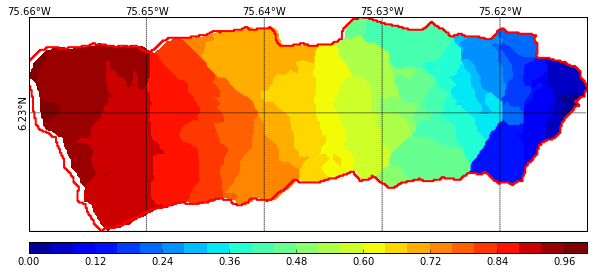

In [12]:
#Figura de tiempos de viaje 
cuCap.Plot_basin(cuCap.CellTravelTime,
    ruta = '/media/nicolas/discoGrande/01_SIATA/ParamCuencas/AltaVistaAbajo/IsoCronas.png', 
    lines_spaces=0.01)

Este mapa debe ser recalculado con una mayor cantidad de iteraciones, lo dejamos haciendo luego, ya que toma tiempo, de momento esta malo.

In [13]:
ruta_images = '/media/nicolas/discoGrande/01_SIATA/ParamCuencas/AltaVistaAbajo/'

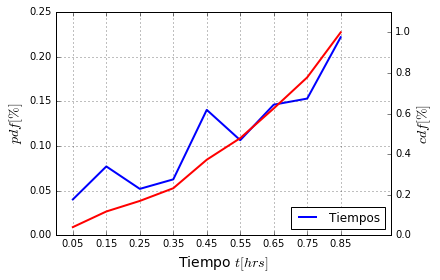

In [14]:
cuCap.Plot_Travell_Hist(ruta=ruta_images + 'Histogram_IsoCronas.png')

### Curva hipsometrica y cauce ppal 

In [15]:
cuCap.GetGeo_Cell_Basics()
cuCap.GetGeo_Ppal_Hipsometric(intervals=50)

/usr/local/lib/python2.7/dist-packages/wmf/wmf.py:482: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  Y = pd.rolling_mean(Y,window)


In [16]:
cuCap.Plot_Hipsometric(normed=True,ventana=10, ruta=ruta_images+'Hipsometrica_Captacion.png')

/usr/local/lib/python2.7/dist-packages/wmf/wmf.py:1811: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  elevPpal=pd.rolling_mean(elevPpal,ventana)


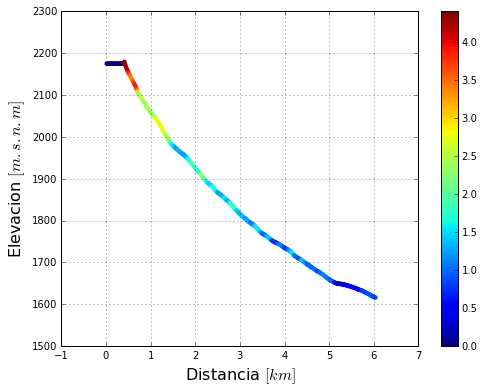

In [17]:
cuCap.PlotPpalStream(ruta=ruta_images+'Perfil_cauce_ppal_Capta.png')

El cauce principal presenta un desarrollo típico de una cuenca mediana-grande, en donde de ve claramente una zona de producción de sedimentos entre los 0 y 10 km, y de los 10km en adelante se presenta una zona de transporte y depositación con pendientes que oscilan entre 0.0 y 0.8 %

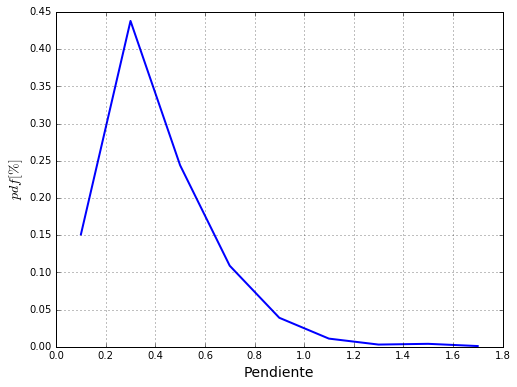

In [18]:
cuCap.PlotSlopeHist(bins=[0,2,0.2],ruta=ruta_images+'Slope_hist_cap.png')

El histograma de pendientes muestra que gran parte de las pendientes son inferiores al 0.6, por lo cual se considera que el cauce ppal de la cuenca se desarrolla ppalmente sobre un valle.

### Mapas de Variables Geomorfo 

In [19]:
cuCap.GetGeo_HAND()

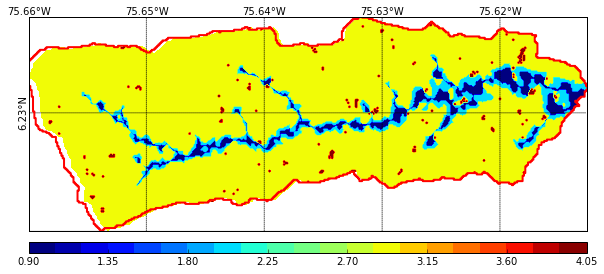

In [20]:
cuCap.Plot_basin(cuCap.CellHAND_class, ruta=ruta_images+'Map_HAND_class.png', lines_spaces=0.01)

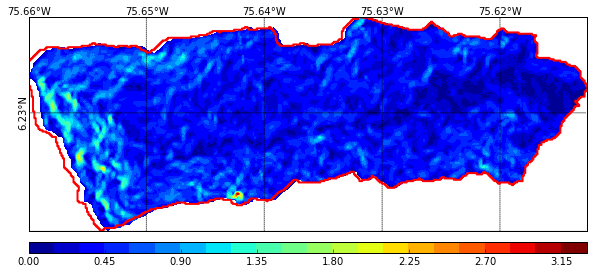

In [21]:
cuCap.Plot_basin(cuCap.CellSlope, ruta=ruta_images + 'Map_Slope.png', lines_spaces=0.01)

El mapa de pendientes muestra como las mayores pendientes en la cuenca se desarrollan en la parte alta de la misma, en la medida en que se observa el desarrollo de la cuenca en la zona baja esta muestra claramente como las pendientes comienzan a ser bajas.

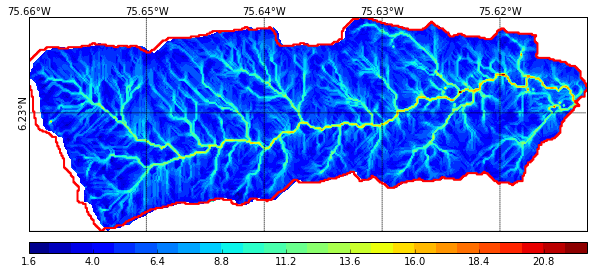

In [22]:
IT = cuCap.GetGeo_IT()
cuCap.Plot_basin(IT, ruta = ruta_images+'Indice_topografico.png', lines_spaces= 0.01)

# Precipitación 

A continuación se realiza el análisis de la precipitación en la zona, de esta manera se conocen las condiciones climáticas en la región.

## Procedimiento para Desagregar lluvia (obtener IDF)

Lee la estación de epm con datos horarios 

## Caudales 

Calculo de caudales medio de largo plazo mediante el campo de precipitación estimado para la zona mediante el uso de las estaciones del IDEAM 

- Q medio por balance.
- Qmax por regionalización y HU sintéticas 
- Qmin por regionalización y análisis de serie de caudales simulada a la salida de la cuenca 

### Caudal Medio Largo Plazo

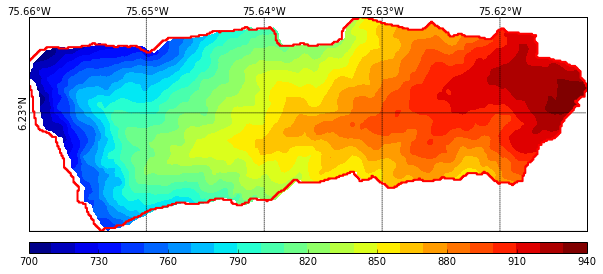

Caudal Captacion: 0.181601


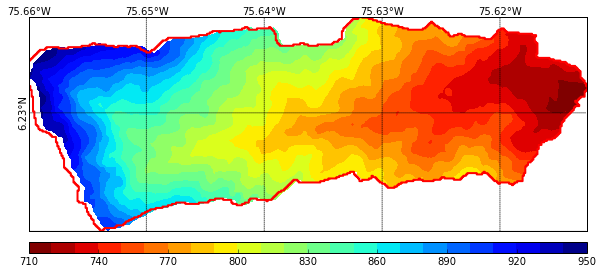

In [83]:
Precip = 1650
cuCap.GetQ_Balance(Precip)
cuCap.Plot_basin(cuCap.CellETR, ruta=ruta_images+'Map_ETR_Turc.png', lines_spaces=0.01)

cuCap.GetQ_Balance(Precip)
print 'Caudal Captacion:', cuCap.CellQmed[-1]

cuCap.Plot_basin(Precip - cuCap.CellETR, ruta = ruta_images+'Map_RunOff_mm_ano.png',
    lines_spaces=0.01,
    colorTable = 'jet_r')

___
### Caudales extremos por regionalización

Se calculan los caudales extremos máximos y mínimos para los periodos de retorno de:
- 2.33, 5, 10, 25, 50, 75 y 100

Se utilizan las siguientes metodologías:

- Regionalización con gumbel y lognormal.

In [74]:
#Periodos de retrorno para obtener maximos y minimos
Tr=[2.33, 5, 10, 25, 50, 100]

In [84]:
QmaxRegGum = cuCap.GetQ_Max(cuCap.CellQmed, Dist='gumbel',  Tr= Tr, Coef = [6.71, 3.29], Expo = [1.2, 0.9])
QmaxRegLog = cuCap.GetQ_Max(cuCap.CellQmed, Dist='lognorm',  Tr= Tr, Coef = [6.71, 3.29], Expo = [1.2, 0.9])
QminRegLog = cuCap.GetQ_Min(cuCap.CellQmed, Dist='lognorm',  Tr= Tr,)
QminRegGum = cuCap.GetQ_Min(cuCap.CellQmed, Dist='gumbel',  Tr= Tr,)

Se guarda el mapa con el caudal medio, y los maximos y minimos para toda la red hídrica de la cuenca 

In [76]:
Dict = {'Qmed':cuCap.CellQmed}
for t,q in zip([2.33,5,10,25,50,100],QminRegGum):       
    Dict.update({'min_g'+str(t):q})
for t,q in zip([2.33,5,10,25,50,100],QminRegLog):       
    Dict.update({'min_l'+str(t):q})
for t,q in zip([2.33,5,10,25,50,100],QmaxRegGum):       
    Dict.update({'max_g'+str(t):q})
for t,q in zip([2.33,5,10,25,50,100],QmaxRegLog):       
    Dict.update({'max_l'+str(t):q})

### Caudales Máximos

Adicional a los caudales máximos estimados por regionalización, se estiman los caudales máximos por el método de hidrógrafa unitaria sintética:

- sneyder.
- scs.
- williams 

In [37]:
cuCap.GetGeo_Parameters()

In [90]:
#Parametros pára maximos 
TcCap = np.median(cuCap.Tc.values())
#CN = 50
CN=80
print 'tiempo viaje medio Captacion:', TcCap
print u'Número de curva:', CN

tiempo viaje medio Captacion: 0.571268382451
Número de curva: 80


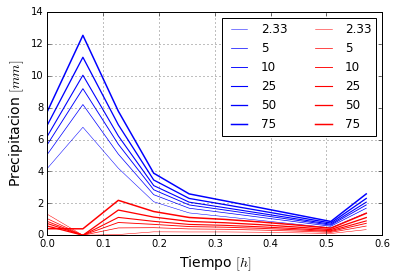

In [91]:
# Obtención de la lluvia de diseño.
Intensidad = [40.9, 49.5, 55.5, 60.6, 67.4, 75.7]
# Lluvia efectiva    
lluviaTr,lluvEfect,S = cuCap.GetHU_DesingStorm(np.array(Intensidad),
	TcCap,
	CN=CN,
	plot='si',
	ruta=ruta_images + 'Q_max_LLuvia_Efectiva_descarga.png',
	Tr=[2.33, 5, 10, 25, 50, 75, 100])

Se presenta en la figura como para diferentes periodos de retorno se da una pérdida de la cantidad de lluvia efectiva 

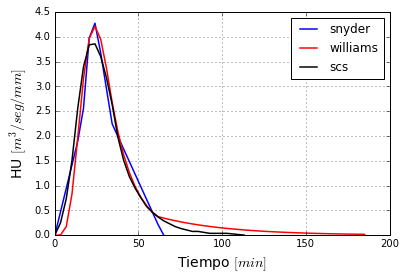

In [92]:
#Calcula los HU para la descarga
Tscs,Qscs,HU=cuCap.GetHU_SCS(cuCap.GeoParameters['Area[km2]'],
    TcCap,)
Tsnyder,Qsnyder,HU,Diferencia=cuCap.GetHU_Snyder(cuCap.GeoParameters['Area[km2]'],
	TcCap,
	Cp=0.8,
	Fc=2.9)
	#Cp=1.65/(np.sqrt(PendCauce)**0.38))
Twilliam,Qwilliam,HU=cuCap.GetHU_Williams(cuCap.GeoParameters['Area[km2]'],
	cuCap.GeoParameters['Long_Cuenca [km]'],
	780,
	TcCap)
#Agrupa los hidrogramas unitarios para luego plotearlos
D = {'snyder':{'time':Tsnyder,'HU':Qsnyder},
    'scs':{'time':Tscs,'HU':Qscs},
    'williams':{'time':Twilliam,'HU':Qwilliam}}
#Hace el plot de ellos 
cuCap.PlotHU_Synthetic(D,ruta=ruta_images + 'Q_max_HU.png')

Hidrogramas unitarios calibrados para la cuenca, williams muestra un rezago en este caso con las demás metodologías

In [78]:
#QmaxRegGum = cuCap.GetQ_Max(cuCap.CellQmed, Dist='gumbel',  Tr= Tr, Coef = [6.71, 3.29], Expo = [1.2, 0.9])
#QmaxRegLog = cuCap.GetQ_Max(cuCap.CellQmed, Dist='lognorm',  Tr= Tr, Coef = [6.71, 3.29], Expo = [1.2, 0.9])

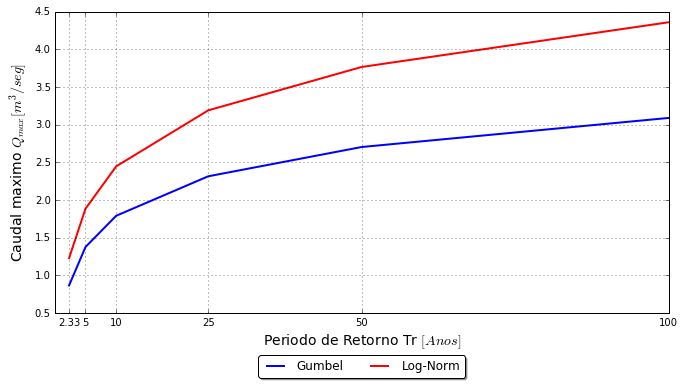

In [98]:
#Realiza la convolucion de los hidrogramas sinteticos con la tormenta de diseno
HidroSnyder,QmaxSnyder,Tsnyder = cuCap.GetHU_Convolution(Tsnyder,Qsnyder,lluvEfect)
HidroWilliam,QmaxWilliam,Twilliam = cuCap.GetHU_Convolution(Twilliam,Qwilliam,lluvEfect)
HidroSCS,QmaxSCS,Tscs = cuCap.GetHU_Convolution(Tscs,Qscs,lluvEfect)

DicQmax = {#'Snyder':QmaxSnyder,
    #'Williams':QmaxWilliam,
    #'SCS': QmaxSCS,
    'Gumbel': QmaxRegGum[:,-1],
    'Log-Norm': QmaxRegLog[:,-1]}
#Plot de maximos 
pyt.PlotQmaxTr(DicQmax,Tr,ruta=ruta_images + 'Q_max_Metodos_Tr_descarga.png')
#Tablas de maximos 
DataQmax = pd.DataFrame(DicQmax, index=Tr)
#Escritura en excel.
writer = pd.ExcelWriter(ruta_images + 'Qmax_captacion.xlsx')
DataQmax.to_excel(ruta_images + 'Qmax_captacion.xls')

In [99]:
cuCap.GeoParameters

{'Area[km2]': 7.0903081048583987,
 'Centro_[X]': -75.638641,
 'Centro_[Y]': 6.2339039,
 'H Cauce_Max [m]': 2332.0,
 'Hmax_[m]': 2542.0,
 'Hmean_[m]': 1973.9344,
 'Hmin_[m]': 1609.0,
 'Long_Cau [km]': 6.2291962890625001,
 'Long_Cuenca [km]': 5.252536773681641,
 'Pend_Cauce [%]': 9.9195762388338498,
 'Pend_Cuenca [%]': 40.385818481445312,
 'Perimetro[km]': 17.13229974269867}